In [1]:
import sys
sys.path.append(r'C:\Users\Nick\Documents\svn\Python\RelativeAge')


In [3]:
"""
Import the module and set up some helper functions.
"""
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import relativeage as ra
    

5.8412472521315517e-19

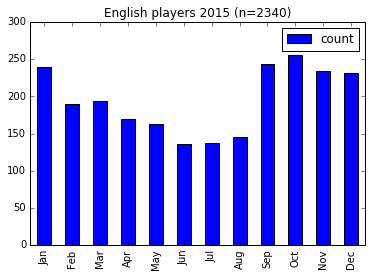

In [4]:
england = ra.ft.get_england(2015)
ra.plot_by_month(england['DOB'], "English players 2015", r"C:\temp\relative_age\football\england_2015.jpg")

ra.chi_squared(england.DOB)

,Count,Offset,First half percentage,First to fourth quarter ratio
All,2340,-23.51,60.09,1.82
Senior,1672,-19.49,58.55,1.66
Junior,668,-33.56,63.92,2.33


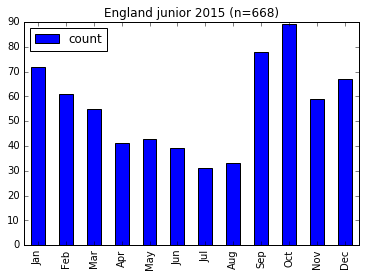

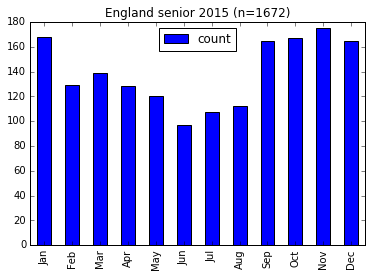

In [47]:
start_year = 2015
cut_off = date(start_year - 20, 9, 1)
england = ra.ft.get_england(start_year)
england_junior = england[england.loc[:,'DOB'] > cut_off]
england_senior = england[england.loc[:,'DOB'] <= cut_off]

ra.plot_by_month(england_junior.DOB, "England junior 2015", r"C:\temp\relative_age\football\england_junior_2015.jpg")
ra.plot_by_month(england_senior.DOB, "England senior 2015", r"C:\temp\relative_age\football\england_senior_2015.jpg")

ra.summary_table(['All', 'Senior', 'Junior'], [england.DOB, england_senior.DOB, england_junior.DOB], 9)

In [31]:
ra.chi_squared(england_senior.DOB)

1.0495153664831573e-08

In [32]:
# English leagues by division
england = ra.ft.get_england(2015)
divisions = england.Div.unique()
data = [england[england.Div==div]['DOB'] for div in divisions]
ra.summary_table(divisions, data, 9)

,Count,Offset,First half percentage,First to fourth quarter ratio
faprem,326,-27.76,60.43,2.28
flcham,410,-22.13,60.73,1.68
flone,539,-23.71,59.93,1.66
fltwo,555,-19.21,58.74,1.61
national,510,-26.35,60.98,2.19


In [54]:
# English leagues by position
def by_position(full, term_start_month):
    positions = sorted(full.Pos.unique())
    data = [full[full.Pos==pos]['DOB'] for pos in positions]
    return ra.summary_table(positions, data, term_start_month)

england = ra.ft.get_england(2015)
df = by_position(england, 9).reindex(['G', 'D', 'M', 'F']).rename(index={'G': 'Goal Keeper', 'D': 'Defender', 'M': 'Midfield', 'F': 'Forward'})
df

,Count,Offset,First half percentage,First to fourth quarter ratio
Goal Keeper,249,-19.87,55.82,1.76
Defender,764,-30.34,62.83,2.22
Midfield,824,-20.67,59.95,1.69
Forward,503,-19.57,58.25,1.56


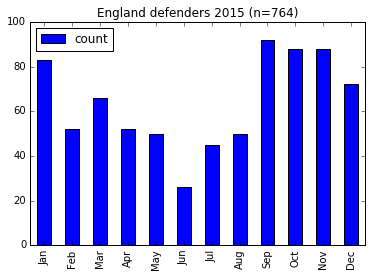

In [46]:
defenders = england[england.Pos=='D']
ra.plot_by_month(defenders.DOB, "England defenders 2015", r"C:\temp\relative_age\football\england_defenders_2015.jpg")

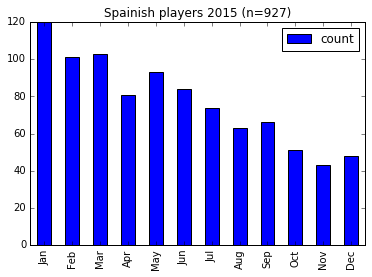

In [45]:
spain = ra.ft.get_spain(2015)
ra.plot_by_month(spain.DOB, "Spainish players 2015", r"C:\temp\relative_age\football\spain_2015.jpg")

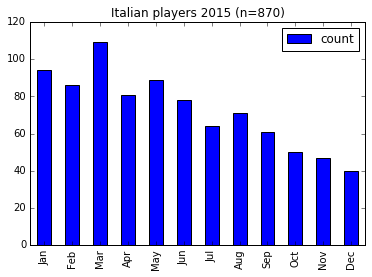

In [44]:
italy = ra.ft.get_italy(2015)
ra.plot_by_month(italy.DOB, "Italian players 2015", r"C:\temp\relative_age\football\italy_2015.jpg")


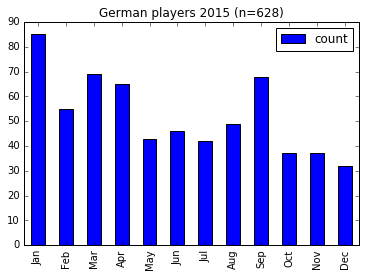

In [43]:
germany = ra.ft.get_germany(2015)
ra.plot_by_month(germany.DOB, "German players 2015", r"C:\temp\relative_age\football\germany_2015.jpg")

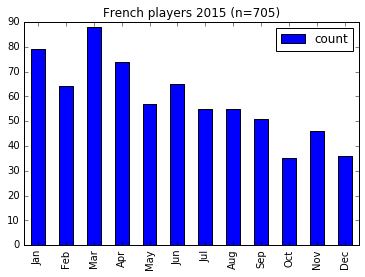

In [42]:
france = ra.ft.get_france(2015)
ra.plot_by_month(france.DOB, "French players 2015", r"C:\temp\relative_age\football\france_2015.jpg")

In [15]:
ra.summary_table(["Spain", "Italy", "Germany", "France"], 
                 [spain.DOB, italy.DOB, germany.DOB, france.DOB],
                 1)

,Count,Offset,First half percentage,First to fourth quarter ratio
Spain,927,-31.74,63.86,2.36
Italy,870,-27.81,62.30,2.19
Germany,628,-23.84,58.60,2.10
France,705,-26.09,61.42,2.02


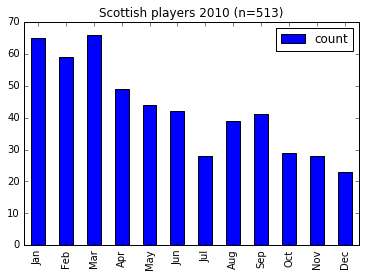

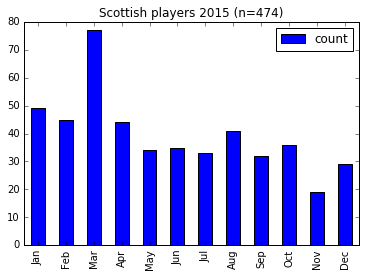

In [41]:
scotland_10 = ra.ft.get_country_players('scotland', 2010)
ra.plot_by_month(scotland_10.DOB, "Scottish players 2010", r"C:\temp\relative_age\football\scotland_2010.jpg")

scotland_15 = ra.ft.get_country_players('scotland', 2015)
ra.plot_by_month(scotland_15.DOB, "Scottish players 2015", r"C:\temp\relative_age\football\scotland_2015.jpg")


In [58]:
england_08 = ra.ft.get_country_players('england', 2008)
england_12 = ra.ft.get_country_players('england', 2012)
england_16 = ra.ft.get_country_players('england', 2016)
ra.summary_table(["2008", "2012", "2016"], 
                 [england_08.DOB, england_12.DOB, england_16.DOB],
                 9)

,Count,Offset,First half percentage,First to fourth quarter ratio
2008,2210,-28.15,62.22,2.06
2012,2353,-24.19,60.73,1.92
2016,1991,-22.17,59.37,1.76
